In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import os

In [2]:
df = pd.read_csv(os.path.join("../data/master_dataset_1700-2021.csv"))
df.head()

,Year,Country,Population,Life Expectancy Years,GDP (income per capita),Fertility Rate,Child Motality 0-5 YO,Education (female 15-44),Contraceptive Use percent,Education (yrs based on index)
0,1799,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN,NaN
1,1800,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN,NaN
2,1801,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN
3,1802,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN
4,1803,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN


In [3]:
df_n = df.dropna(axis=0,subset = ['Education (yrs based on index)'])
df_n.head()

,Year,Country,Population,Life Expectancy Years,GDP (income per capita),Fertility Rate,Child Motality 0-5 YO,Education (female 15-44),Contraceptive Use percent,Education (yrs based on index)
70,1869,Bangladesh,23500000,25.5,881,6.7,508.0,NaN,NaN,0.010005
75,1874,Bangladesh,23800000,25.4,892,6.7,508.0,NaN,NaN,0.010005
80,1879,Bangladesh,24300000,24.4,903,6.7,522.0,NaN,NaN,0.019950
85,1884,Bangladesh,24700000,23.2,939,6.7,540.0,NaN,NaN,0.019950
90,1889,Bangladesh,25100000,22.4,968,6.7,552.0,NaN,NaN,0.019950


In [4]:
#Clean dataframe.
clean_df = df_n.drop(['Population', 'Life Expectancy Years', 'GDP (income per capita)', 
                     'Child Motality 0-5 YO', 'Contraceptive Use percent', 
                     'Education (female 15-44)'], axis = 1)
clean_df.head()

,Year,Country,Fertility Rate,Education (yrs based on index)
70,1869,Bangladesh,6.7,0.010005
75,1874,Bangladesh,6.7,0.010005
80,1879,Bangladesh,6.7,0.019950
85,1884,Bangladesh,6.7,0.019950
90,1889,Bangladesh,6.7,0.019950


In [5]:
#Rearrage data:
order_df = clean_df[['Country', 'Year', 'Fertility Rate', 'Education (yrs based on index)']]
order_df.head()

,Country,Year,Fertility Rate,Education (yrs based on index)
70,Bangladesh,1869,6.7,0.010005
75,Bangladesh,1874,6.7,0.010005
80,Bangladesh,1879,6.7,0.019950
85,Bangladesh,1884,6.7,0.019950
90,Bangladesh,1889,6.7,0.019950


In [6]:
#Reformat data:
data = order_df.values

x = data[:,1:4]

y = data[:,0]

In [7]:
y

array(['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh',
       'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Brazil',
       'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil',
       'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil',
       'Brazil', 'Brazil', 'Brazil', 

In [8]:
from sklearn.preprocessing import LabelEncoder
#Label-encoder:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Enco

In [10]:
 # Assign the data to X and y

#X = clean_df["Education (yrs based on index)"].values.reshape(-1, 1)
#y = clean_df["Fertility Rate"].values.reshape(-1, 1)
#print(X.shape, y.shape)

In [11]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
pd.get_dummies(y)

,Bangladesh,Brazil,China,"Congo, Dem. Rep.",Egypt,Ethiopia,India,Indonesia,Japan,Nigeria,Pakistan,Russia,Tanzania,United States
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0,0,0,0,0,0,0,0,0,0,0,0,0,1
602,0,0,0,0,0,0,0,0,0,0,0,0,0,1
603,0,0,0,0,0,0,0,0,0,0,0,0,0,1
604,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
X = order_df[['Country', 'Education (yrs based on index)']]
y = order_df['Fertility Rate'].values.reshape(-1,1)

print(order_df['Education (yrs based on index)'].shape)
print("Shape: ", X.shape, y.shape)

(606,)
Shape:  (606, 2) (606, 1)


In [15]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Education (yrs based on index),Country_Bangladesh,Country_Brazil,Country_China,"Country_Congo, Dem. Rep.",Country_Egypt,Country_Ethiopia,Country_India,Country_Indonesia,Country_Japan,Country_Nigeria,Country_Pakistan,Country_Russia,Country_Tanzania,Country_United States
2661,11.40000,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1758,5.20500,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1656,0.01995,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1498,0.94050,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1095,5.29500,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#X = pd.get_dummies(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#X_test

In [16]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

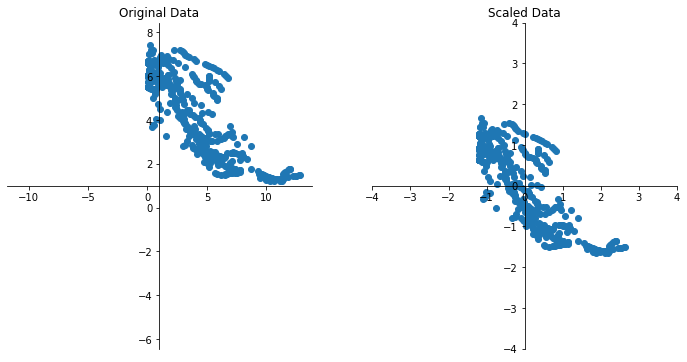

In [19]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Education (yrs based on index)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-4, 4)
axes2.set_ylim(-4, 4)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Education (yrs based on index)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Should I keep this if it works without it as well?

In [21]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#Should I keep this if it works without it as well?

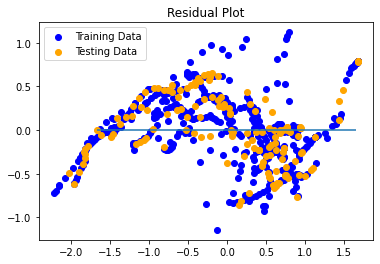

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [23]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.14246525303588545, R2: 0.8586268277077707
